In [1]:
import tensorflow as tf

* 
**tensorflow 中錯誤的計算方式**  
tensorflow中的計算，需要透過 session 的 run 來執行  
故以下程式並沒有計算z的實際值，只是定義而已

In [2]:
x = tf.constant([[2,4]]) #建立一個常數矩陣 x
y = tf.constant([[8],[7]]) #建立一個常數矩陣 y
z = tf.matmul(x, y) #在tensorflow中，這行並沒有計算z
print(z)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


* 
**正確的tensorflow計算方式**  
tensorflow 中的計算，必須使用 Session 中的 graph 來執行  
宣告一個Session 其中會有一個默認的 graph

In [3]:
x = tf.constant([[2,4]]) #建立一個常數矩陣 x
y = tf.constant([[8],[7]]) #建立一個常數矩陣 y
z = tf.matmul(x, y) #並沒有計算，只是定義一個 z
sess = tf.Session()  #宣告了一個 session 後，裡面會有一個默認的 graph
result = sess.run(z)
print(z) #這並不會秀出結果
print(result) #這才會秀出結果
sess.close() #執行過後關閉 session

Tensor("MatMul_1:0", shape=(1, 1), dtype=int32)
[[44]]


* 
**Session的簡便定義方式**

In [4]:
#一般來說，可以這樣子定義 session， 比較簡便，無須在最後加 sess.close()
x = tf.constant([[2,4]])
y = tf.constant([[8],[7]])
z = tf.matmul(x, y)
with tf.Session() as sess:
    result = sess.run(z)
    print(result)

[[44]]


* 
**Tensorflow 中 Variable 的使用**

In [5]:
# tensorflow 變數的使用
x = tf.Variable([1,2])  #宣告變數 x
a = tf.constant([8,7])
sub = tf.subtract(x,a)  #sub 是一個減法的 operator
add = tf.add(x,a) #add 是一個加法的 operator

#注意，在tensorflow中，執行變數之前，必須先初始化
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init) #先初始化
    result = sess.run(sub)
    print(result)
    result = sess.run(add)
    print(result)

[-7 -5]
[9 9]


In [6]:
state = tf.Variable(0, name = 'counter') #建立一個變數，初始化為0，取名為counter
current = tf.add(state, 1) #建立一個operator ，其為 counter 變數 + 1
#tensorflow 中的變數給值，比較複雜，必須透過 "賦值"operator
update = tf.assign(state, current) # state <- current
#注意只要在 tensorflow 中有使用變數的話，就要定義變數初始化 operator
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state)) #列印初始值
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))
#當sess執行 update operator 時，會將 current 指定給 state
#當執行 assign operator 時，會遇到 current ，其中current 也是一個 opertaor
#current 是一個　add operator ，會將state + 1
#如果直接 print(state) 並不會顯示變數的值
#要看變數的內容值 需透過 print(sess.run(state))

0
1
2
3
4
5


* 
** Fetch **

In [7]:
#Fetch : 在session中同時執行多個operator
#定義一系列 Float 常數
input1 = tf.constant(3.0) 
input2 = tf.constant(6.0)
input3 = tf.constant(2.5)
add = tf.add(input1, input2)
mul = tf.multiply(input3, add)
with tf.Session() as sess:
    result = sess.run([add, mul]) #Fetch
    print(result)

[9.0, 22.5]


* 
**Feed**

In [8]:
#Feed : 要計算再給值
#創造兩個佔位符 
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
with tf.Session() as sess:
    feed_dict = {input1 : [2.4], input2 : [3.0]}
    #將 feed 的數據以字典的形式傳入 operator
    print(sess.run(output, feed_dict))

[7.2000003]


* 
**Tensorflow 最簡單範例 (線性回歸)**

iter= 0 , m= 1.2001193 , b= 2.1313047
iter= 1 , m= 1.4411813 , b= 2.5945857
iter= 2 , m= 1.4781934 , b= 2.701713
iter= 3 , m= 1.4722012 , b= 2.73256
iter= 4 , m= 1.4575415 , b= 2.746842
iter= 5 , m= 1.4415208 , b= 2.7573094
iter= 6 , m= 1.4256802 , b= 2.7666926
iter= 7 , m= 1.4103309 , b= 2.7755835
iter= 8 , m= 1.3955231 , b= 2.7841182
iter= 9 , m= 1.3812515 , b= 2.7923348
iter= 10 , m= 1.3674996 , b= 2.8002503
iter= 11 , m= 1.3542491 , b= 2.8078766
iter= 12 , m= 1.3414819 , b= 2.8152246
iter= 13 , m= 1.3291804 , b= 2.8223047
iter= 14 , m= 1.3173276 , b= 2.8291266
iter= 15 , m= 1.3059071 , b= 2.8356996
iter= 16 , m= 1.2949032 , b= 2.842033
iter= 17 , m= 1.2843006 , b= 2.8481352
iter= 18 , m= 1.2740847 , b= 2.8540149
iter= 19 , m= 1.2642415 , b= 2.8596802
iter= 20 , m= 1.2547573 , b= 2.8651388
iter= 21 , m= 1.2456189 , b= 2.8703983
iter= 22 , m= 1.236814 , b= 2.8754659
iter= 23 , m= 1.2283303 , b= 2.8803487
iter= 24 , m= 1.220156 , b= 2.8850534
iter= 25 , m= 1.2122798 , b= 2.8895864
ite

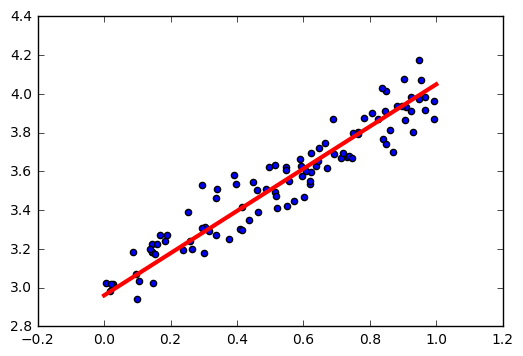

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#產生一個含有隨機的線性模型
x_data = np.random.rand(100) #均勻隨機產生100個點
noise = 0.1*np.random.randn(100) #隨機項
y_data = x_data * 1 + 3 + noise  # y_data = 1 * x_data + 3  + noise

#宣告 tensorflow 中的變數
# y = m*x + b
m = tf.Variable(0.0)
b = tf.Variable(0.0)
y = m*x_data + b

#代價函數 : loss = mean((y-y_data)^2)
#其中 tf.reduce_mean 計算 tensor中每一個 dimension 的平均值
# tf.square 計算 tensor 中每一個元的平方
loss = tf.reduce_mean(tf.square(y_data - y))

#Gradient desent method  (learning rate = 0.1)
gd = tf.train.GradientDescentOptimizer(0.3)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(50):
        sess.run(train)
        print("iter=", step, ", m=",sess.run(m), ", b=", sess.run(b))
    #將 train 後的結果存下來
    m = sess.run(m);
    b = sess.run(b);
    #繪製結果圖
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot([0, 1], [b, m*1+b], '-r', lw=3)
    plt.show()
